In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.7
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_10_51_300_0.7_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_10_51_300_0.7_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.4058

Best Fitness:	600.2512
Solution:	600.0000
Diff:		0.2512

[0:09:20][----------] 1.96% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.1716

Best Fitness:	600.1176
Solution:	600.0000
Diff:		0.1176

[0:18:05][----------] 3.92% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.4527

Best Fitness:	600.2838
Solution:	600.0000
Diff:		0.2838

[0:26:50][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.3400

Best Fitness:	600.2423
Solution:	600.0000
Diff:		0.2423

[0:35:08][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.3084

Best Fitness:	600.1958
Solution:	600.0000
Diff:		0.1958

[0:43:14][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2810

Best Fitness:	600.1876
Solution:	600.0000
Diff:		0.1876

[0:50:21][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2441

Best Fitness:	600.1500
Solution:	600.0000
Diff:		0.1500

[0:57:47][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2521

Best Fitness:	600.1653
Solution:	600.0000
Diff:		0.1653

[1:04:43][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.3609

Best Fitness:	600.2241
Solution:	600.0000
Diff:		0.2241

[1:11:48][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.4903

Best Fitness:	600.3331
Solution:	600.0000
Diff:		0.3331

[1:19:03][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.1941

Best Fitness:	600.1332
Solution:	600.0000
Diff:		0.1332

[1:26:11][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.5868

Best Fitness:	600.4132
Solution:	600.0000
Diff:		0.4132

[1:32:56][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.4577

Best Fitness:	600.2568
Solution:	600.0000
Diff:		0.2568

[1:39:22][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.1354

Best Fitness:	600.0902
Solution:	600.0000
Diff:		0.0902

[1:45:33][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.3544

Best Fitness:	600.2089
Solution:	600.0000
Diff:		0.2089

[1:51:45][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2177

Best Fitness:	600.1328
Solution:	600.0000
Diff:		0.1328

[1:58:11][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2232

Best Fitness:	600.1557
Solution:	600.0000
Diff:		0.1557

[2:04:33][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.3004

Best Fitness:	600.1483
Solution:	600.0000
Diff:		0.1483

[2:10:51][####------] 35.29% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2992

Best Fitness:	600.1795
Solution:	600.0000
Diff:		0.1795

[2:17:03][####------] 37.25% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.4631

Best Fitness:	600.2546
Solution:	600.0000
Diff:		0.2546

[2:23:17][####------] 39.22% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2003

Best Fitness:	600.1348
Solution:	600.0000
Diff:		0.1348

[2:28:57][####------] 41.18% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.3648

Best Fitness:	600.2159
Solution:	600.0000
Diff:		0.2159

[2:34:23][####------] 43.14% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2138

Best Fitness:	600.1382
Solution:	600.0000
Diff:		0.1382

[2:39:55][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2402

Best Fitness:	600.1515
Solution:	600.0000
Diff:		0.1515

[2:45:25][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	601.2667

Best Fitness:	601.1228
Solution:	600.0000
Diff:		1.1228

[2:50:58][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2694

Best Fitness:	600.1865
Solution:	600.0000
Diff:		0.1865

[2:56:22][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.1835

Best Fitness:	600.0712
Solution:	600.0000
Diff:		0.0712

[3:01:40][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.1513

Best Fitness:	600.0900
Solution:	600.0000
Diff:		0.0900

[3:07:00][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2166

Best Fitness:	600.1376
Solution:	600.0000
Diff:		0.1376

[3:11:44][######----] 56.86% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.1869

Best Fitness:	600.1217
Solution:	600.0000
Diff:		0.1217

[3:16:32][######----] 58.82% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.1754

Best Fitness:	600.1072
Solution:	600.0000
Diff:		0.1072

[3:21:10][######----] 60.78% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.3892

Best Fitness:	600.2546
Solution:	600.0000
Diff:		0.2546

[3:25:52][######----] 62.75% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.8446

Best Fitness:	600.4649
Solution:	600.0000
Diff:		0.4649

[3:30:34][######----] 64.71% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2242

Best Fitness:	600.1401
Solution:	600.0000
Diff:		0.1401

[3:35:14][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2846

Best Fitness:	600.1349
Solution:	600.0000
Diff:		0.1349

[3:39:54][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2180

Best Fitness:	600.1281
Solution:	600.0000
Diff:		0.1281

[3:44:14][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2911

Best Fitness:	600.1924
Solution:	600.0000
Diff:		0.1924

[3:48:14][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2477

Best Fitness:	600.1591
Solution:	600.0000
Diff:		0.1591

[3:52:09][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2255

Best Fitness:	600.0867
Solution:	600.0000
Diff:		0.0867

[3:56:04][########--] 76.47% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2441

Best Fitness:	600.1536
Solution:	600.0000
Diff:		0.1536

[3:59:56][########--] 78.43% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	601.1300

Best Fitness:	601.0226
Solution:	600.0000
Diff:		1.0226

[4:03:46][########--] 80.39% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.3143

Best Fitness:	600.2330
Solution:	600.0000
Diff:		0.2330

[4:07:37][########--] 82.35% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2105

Best Fitness:	600.1404
Solution:	600.0000
Diff:		0.1404

[4:11:22][########--] 84.31% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.4087

Best Fitness:	600.2607
Solution:	600.0000
Diff:		0.2607

[4:14:35][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.1659

Best Fitness:	600.0921
Solution:	600.0000
Diff:		0.0921

[4:17:42][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.5278

Best Fitness:	600.3715
Solution:	600.0000
Diff:		0.3715

[4:20:50][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2428

Best Fitness:	600.1500
Solution:	600.0000
Diff:		0.1500

[4:23:57][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.4121

Best Fitness:	600.2695
Solution:	600.0000
Diff:		0.2695

[4:27:03][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.1745

Best Fitness:	600.1052
Solution:	600.0000
Diff:		0.1052

[4:30:17][##########] 96.08% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2426

Best Fitness:	600.1585
Solution:	600.0000
Diff:		0.1585

[4:33:31][##########] 98.04% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	600.2740

Best Fitness:	600.1562
Solution:	600.0000
Diff:		0.1562

[4:36:35][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:36:35

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
226,0.302783,0.315015,0.317175,0.295656,0.311622,0.27601,0.321834,0.276819,0.265498,0.274964,...,0.315142,0.335633,0.292402,0.280606,0.333016,0.295379,0.337322,0.289797,0.321892,50
227,0.221179,0.315015,0.308154,0.295656,0.293392,0.27601,0.308053,0.272216,0.265498,0.274964,...,0.315142,0.335633,0.292402,0.202092,0.333016,0.295379,0.282155,0.289797,0.321892,50
228,0.221179,0.303883,0.308154,0.295656,0.293392,0.27601,0.308053,0.272216,0.265498,0.274964,...,0.315142,0.335633,0.292402,0.202092,0.333016,0.284648,0.282155,0.289797,0.321892,50
229,0.221179,0.303883,0.308154,0.290024,0.231841,0.27601,0.308053,0.272216,0.265498,0.274964,...,0.232826,0.335633,0.279138,0.202092,0.318874,0.284648,0.280102,0.289797,0.321892,50
230,0.221179,0.303883,0.271753,0.290024,0.231841,0.27601,0.308053,0.272216,0.234034,0.274419,...,0.232826,0.335633,0.275964,0.202092,0.290988,0.284648,0.280102,0.289797,0.313854,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.2512409945225045

Best error for run 1: 0.11758167493530891

Best error for run 2: 0.2837786689715358

Best error for run 3: 0.2422629474714313

Best error for run 4: 0.19576873066091594

Best error for run 5: 0.18758880773168585

Best error for run 6: 0.1500440385660795

Best error for run 7: 0.16527443177210444

Best error for run 8: 0.22414161098276963

Best error for run 9: 0.333110410928839

Best error for run 10: 0.13318191700489024

Best error for run 11: 0.4131885811050324

Best error for run 12: 0.25679423425845016

Best error for run 13: 0.09024659908914145

Best error for run 14: 0.20894902300756257

Best error for run 15: 0.13282032245308528

Best error for run 16: 0.15567299535928214

Best error for run 17: 0.148263647832664

Best error for run 18: 0.1795236036099368

Best error for run 19: 0.2545775606146208

Best error for run 20: 0.13483238182175228

Best error for run 21: 0.21589162595057587

Best error for run 22: 0.13815520250727786

Best error for run 23: 0.15148261422416454

Best error for run 24: 1.122776079867549

Best error for run 25: 0.1864953756031582

Best error for run 26: 0.07120766723369343

Best error for run 27: 0.08997121631523441

Best error for run 28: 0.13760085649846587

Best error for run 29: 0.12169802285745845

Best error for run 30: 0.10722861967906283

Best error for run 31: 0.25459298572343414

Best error for run 32: 0.4649100985752739

Best error for run 33: 0.14007986496642388

Best error for run 34: 0.13488664228236757

Best error for run 35: 0.1281242178328057

Best error for run 36: 0.19242206245030502

Best error for run 37: 0.1591273884888551

Best error for run 38: 0.08674046012231429

Best error for run 39: 0.15355643028840404

Best error for run 40: 1.0225551028803466

Best error for run 41: 0.23304496808839303

Best error for run 42: 0.14038350403905042

Best error for run 43: 0.2606734073017378

Best error for run 44: 0.09212432218578215

Best error for run 45: 0.3715072422735375

Best error for run 46: 0.1499886678511757

Best error for run 47: 0.26950295810388525

Best error for run 48: 0.1051783301541036

Best error for run 49: 0.158499786330367

Best error for run 50: 0.15616742127974703

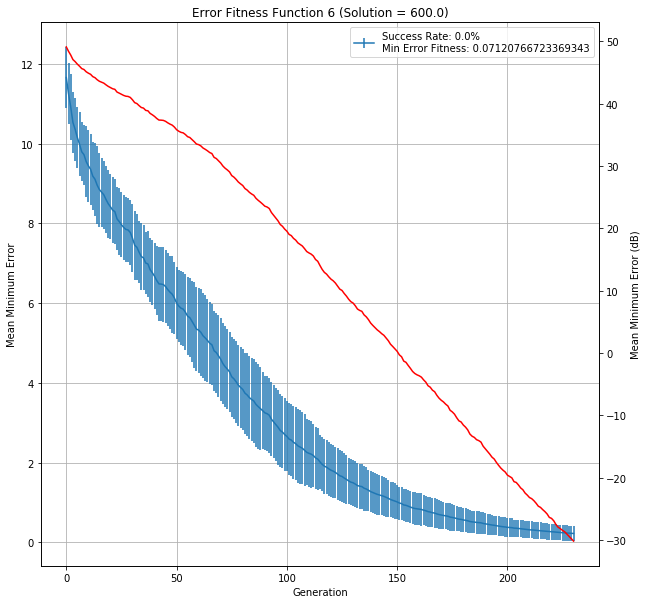

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_10_51_300_0.7_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,10,0.7,0.251241,0.117582,0.283779,0.242263,0.195769,0.187589,...,0.092124,0.371507,0.149989,0.269503,0.105178,0.1585,0.156167,0.221087,4:36:35,69900
